Chen, Joy  
Stat 418: Spring 2019

# Webscraping International Airline Ticket Prices and Determining Opportunities for Foreign Exchange Arbitrage  

### Description
Analyzing pricing trends for international flights to Europe using webscraped data from Norwegian Air Shuttle and comparing between different currencies to determine potential opportunities for foreign exchange arbitrage 

### Acknowledgements
Courtesy of Norwegian Air Shuttle (www.norwegian.com)

#### IMPORT PACKAGES

In [5]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import urllib.parse
from urllib.parse import urlparse

import time
import datetime
import pytz

#### CREATE LISTS

In [318]:
# Specify time right now
now = datetime.datetime.now(pytz.timezone('US/Pacific'))

# Create list of dates beginning from now for six months
dates = pd.date_range(now, periods=180).tolist()

# Create lists of origin and destination airports
orig_port = ['LAX','OAK','SFO','JFK','EWR']
dest_port = ['CPH','ARN','CDG','LGW','AMS','OSL']

# Currency list
curr = ['USD','EUR','GBP','SEK','DKK']

#### RUN SCRAPER

In [323]:
# Create 'master' dataframe in which price data will be saved
tix_data = pd.DataFrame(columns = ['date_year','date_month','date_day','price','fare_type'])

# Run for loop on url
for x in range(0,len(dates),1):
    print('Sleeping...')
    time.sleep(10)
    
    print('Retreiving...')
    # Request URL
    url = str('https://www.norwegian.com/us/ipc/availability/avaday?D_City=%s&A_City=%s&TripType=1&D_Day=%s&D_Month=%s%s&AgreementCodeFK=-1&CurrencyCode=%s&rnd=9038&processid=33487&mode=ab' 
          % (orig_port[0],dest_port[0],dates[x].strftime('%d'),dates[x].strftime("%Y"),dates[x].strftime("%m"),curr[0]))
    
    # Request data
    tix_raw = requests.get(url).text
    
    # Turn into soup
    tix_soup = BeautifulSoup(tix_raw,'html.parser')

    # With a grad-student budget, I am only interested in the lowest fare-class available...
    tix_lowfare = tix_soup.find_all('td', class_='fareselect standardlowfare')
    #tix_lowplus = tix_soup.find_all('td', class_='fareselect standardlowfareplus')
    #tix_stdflex = tix_soup.find_all('td', class_='fareselect standardflex')
    #tix_premlow = tix_soup.find_all('td', class_='fareselect premiumlowfare')
    #tix_premflex = tix_soup.find_all('td', class_='fareselect premiumflex')
    
    # Filter out prices
    prices_lowfare = []
    for i in range(0,len(tix_lowfare),1):
        prices_lowfare.append(tix_lowfare[i].text)
    
    # Create vectors
    date = [dates[x].strftime('%Y-%m-%d')] * len(prices_lowfare)
    date_year = [dates[x].strftime('%Y')] * len(prices_lowfare)
    date_month = [dates[x].strftime('%m')] * len(prices_lowfare)
    date_day = [dates[x].strftime('%d')] * len(prices_lowfare)
    fare_type = ['standard_lowfare'] * len(prices_lowfare)
    
    # Create tempdata
    tix_tempdata = pd.concat([pd.Series(date_year),pd.Series(date_month),pd.Series(date_day),
                              pd.Series(prices_lowfare),pd.Series(fare_type)], axis = 1,
                             keys = ['date_year','date_month','date_day','price','fare_type'])
    
    # Concatenate to master
    tix_data = pd.concat([tix_data, tix_tempdata])
    print('Success!')

ConnectionError: HTTPConnectionPool(host='www.norwegian.com', port=80): Max retries exceeded with url: /us/ipc/availability/avaday?D_City=LAX&A_City=CPH&TripType=1&D_Day=07&D_Month=201905&AgreementCodeFK=-1&CurrencyCode=USD&rnd=9038&processid=33487&mode=ab (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f5cc8478d30>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
# Save copy of tix_data
tix_data2 = tix_data

# Modify date variable
# tix_data2['date']=pd.to_datetime(tix_data['date_year']+tix_data['date_month']+tix_data['date_day'], format='%Y%m%d')

# Modify price to be numeric
tix_data2['price']=tix_data2['price'].replace(',', '', regex=True).astype(float)

#Export data
tix_data2.to_csv('tix_data20190507.csv')

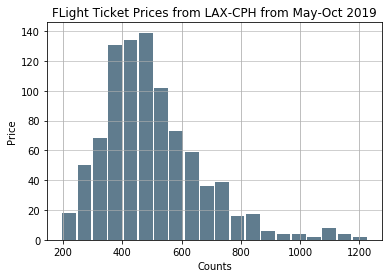

In [311]:
# Histogram
tix_data2['price'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('FLight Ticket Prices from LAX-CPH from May-Oct 2019')
plt.xlabel('Counts')
plt.ylabel('Price')
plt.grid(axis='y', alpha=0.75)

In [ ]:
# Boxplot
tix_data2[['price','date']].boxplot(by='date',grid=False)